In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("../datasets/day_wise_covid.csv",parse_dates=True)
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [63]:
df = df[["Date","Confirmed","New cases"]]
df.head(5)

,Date,Confirmed,New cases
0,2020-01-22,555,0
1,2020-01-23,654,99
2,2020-01-24,941,287
3,2020-01-25,1434,493
4,2020-01-26,2118,684


In [64]:
df = df.set_index("Date")

In [65]:
df["sma"] = df['New cases'].rolling(window=5).mean()

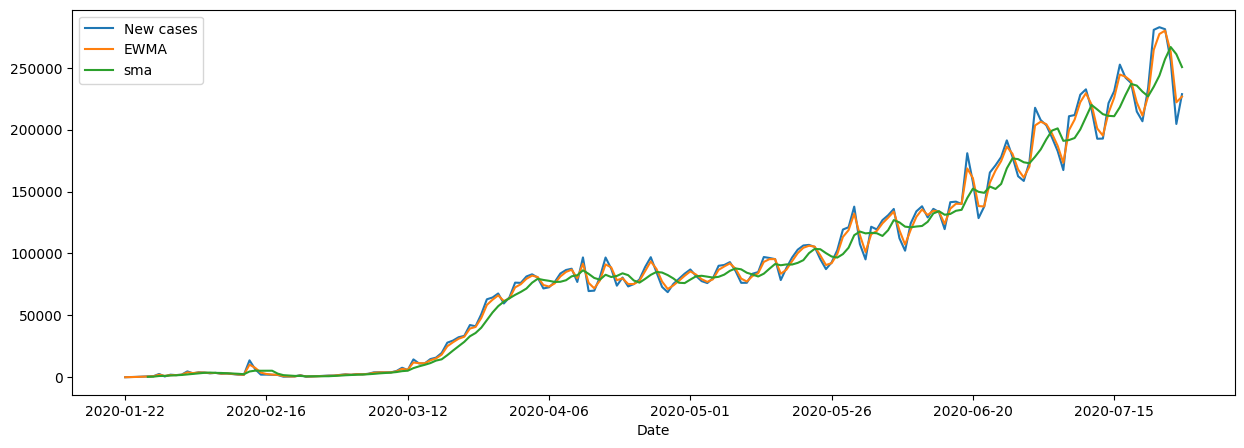

In [66]:
alpha = 0.7
df['EWMA'] = df["New cases"].ewm(alpha=alpha, adjust=False).mean()
df[["New cases","EWMA","sma"]].plot(figsize=(15,5))
plt.show()

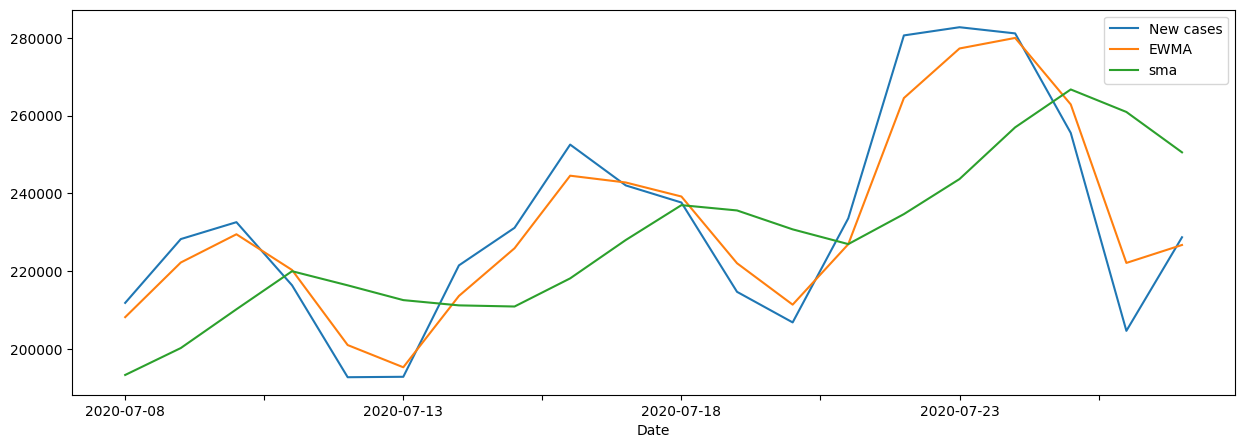

In [67]:
cols = ["New cases","EWMA","sma"]

df.iloc[-20:][cols].plot(figsize=(15,5))
plt.show()

In [68]:
Ntest = 30
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [69]:
train.isna().sum()

Confirmed    0
New cases    0
sma          4
EWMA         0
dtype: int64

In [70]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [72]:
from sklearn.metrics import r2_score

r2_score(train['New cases'], train['EWMA'])

0.9970778354571498

In [73]:
r2_score(test['New cases'], test['EWMA'])

0.9514944368713748

In [74]:
test.tail(10)

,Confirmed,New cases,sma,EWMA
Date,,,,
2020-07-18,14292198,237635,236958.2,239180.998928
2020-07-19,14506845,214647,235597.2,222007.199678
2020-07-20,14713623,206778,230728.4,211346.759904
2020-07-21,14947078,233565,226932.6,226899.527971
2020-07-22,15227725,280647,234654.4,264522.758391
2020-07-23,15510481,282756,243678.6,277286.027517
2020-07-24,15791645,281164,256982.0,280000.608255
2020-07-25,16047190,255545,266735.4,262881.682477
2020-07-26,16251796,204606,260943.6,222088.704743
